In [1]:
%matplotlib ipympl
def figure(name, *args, **kwargs):
    plt.close(name)
    plt.figure(name, *args, **kwargs)

import numpy as np
import pylab as plt
from scipy.fftpack import fft, fftfreq, fftshift, ifft, ifftshift
plt.style.use('default')

## Parameter

In [2]:
f = 1e3 # 1kHz
N = 1000 # sampling points
# Domain of the signal
t = np.linspace(0, 10, N, endpoint=False) * 1e-3 
u0 = 1

# signal
u = u0 * np.sin(2*np.pi*f*t)

Text(0.5, 0, '$t$ in s')

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
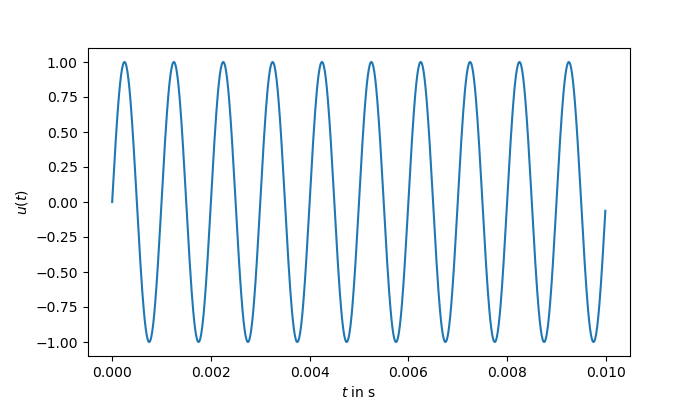

In [3]:
figure(1, figsize=(7,4))
plt.plot(t, u)
plt.ylabel('$u(t)$')
plt.xlabel('$t$ in s')

In [4]:
u_w = abs(fft(u))
w = fftfreq(N, d=t[1]-t[0])

Text(0.5, 0, '$f$ in Hz')

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
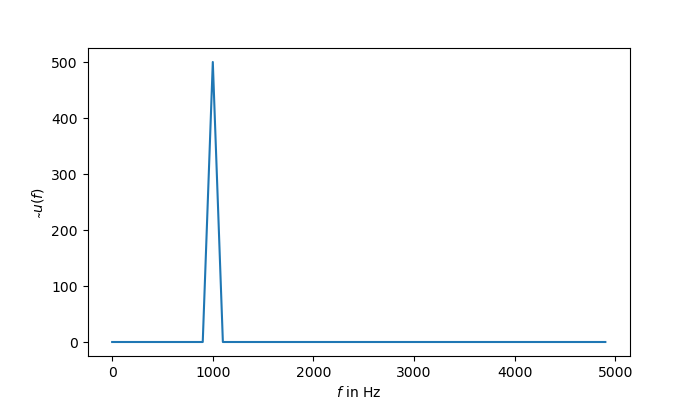

In [5]:
figure(2, figsize=(7,4))
plt.plot(w[0:50], u_w[0:50])
plt.ylabel('$\\tilde u(f)$')
plt.xlabel('$f$ in Hz')

We just got the fft of a sin with an infinite amount of oszillations. Why? The dft is periodic and that means, we have to create a padding at the corners.

## FFT with padding

In [6]:
t_p = np.linspace(-20, 30, N) * 1e-3 
t_signal = np.logical_and(t_p >= 0, t_p < 1e-2)
u_p = np.zeros(N)
u_p[t_signal] = u0 * np.sin(2*np.pi*f*t_p[t_signal])

Text(0.5, 0, '$t$ in s')

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
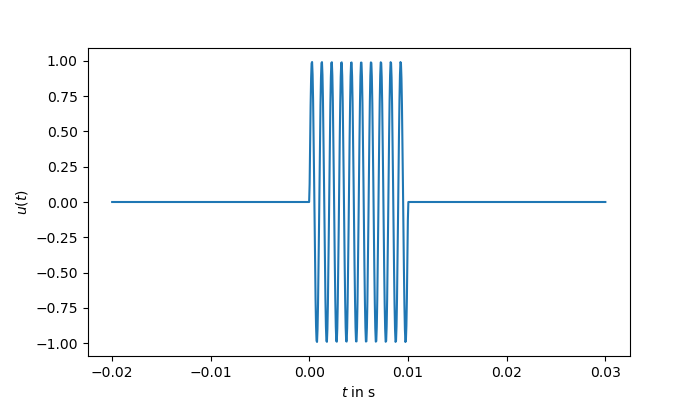

In [7]:
figure(3, figsize=(7,4))
plt.plot(t_p, u_p)
plt.ylabel('$u(t)$')
plt.xlabel('$t$ in s')

In [8]:
u_wp = fftshift(abs(fft(u_p)))
w_p = fftshift(fftfreq(N, d=t_p[1]-t_p[0]))

Text(0.5, 0, '$f/f_0$')

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
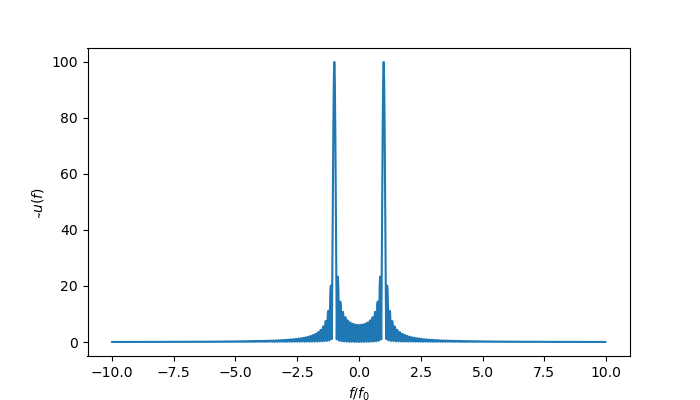

In [9]:
figure(4, figsize=(7,4))
plt.plot(w_p/f, u_wp)
plt.ylabel('$\\tilde u(f)$')
plt.xlabel('$f/f_0$')
# plt.xlim([-2.5, 2.5])

## Analytical solution

In [10]:
f_a = np.linspace(-16000, 16000, 5000)
u_a = - np.e**(10 * 1j * np.pi * f_a/f) / (2*np.pi**2 * 1j)
u_a *= np.sin(10*np.pi * f_a/f) * f / (f_a**2 - f**2)

(-2.5, 2.5)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
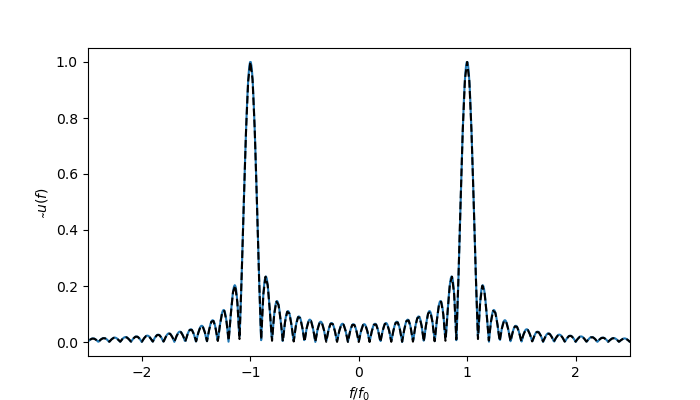

In [11]:
figure(45, figsize=(7,4))
plt.plot(f_a/f, abs(u_a)/np.max(abs(u_a)))
plt.plot(w_p/f, u_wp/ np.max(u_wp), 'k--')
plt.ylabel('$\\tilde u(f)$')
plt.xlabel('$f/f_0$')
plt.xlim([-2.5, 2.5])

## Back transformation

Now, we want to select a window in the spectrum and calculate the back transformation to verify that including the first root is really enough to reconstruct the rectangular shape.

In [12]:
import ipywidgets as widgets
from ipywidgets import interact

interactive(children=(FloatSlider(value=10.0, description='x', layout=Layout(width='500px'), max=10.0), FloatS…

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
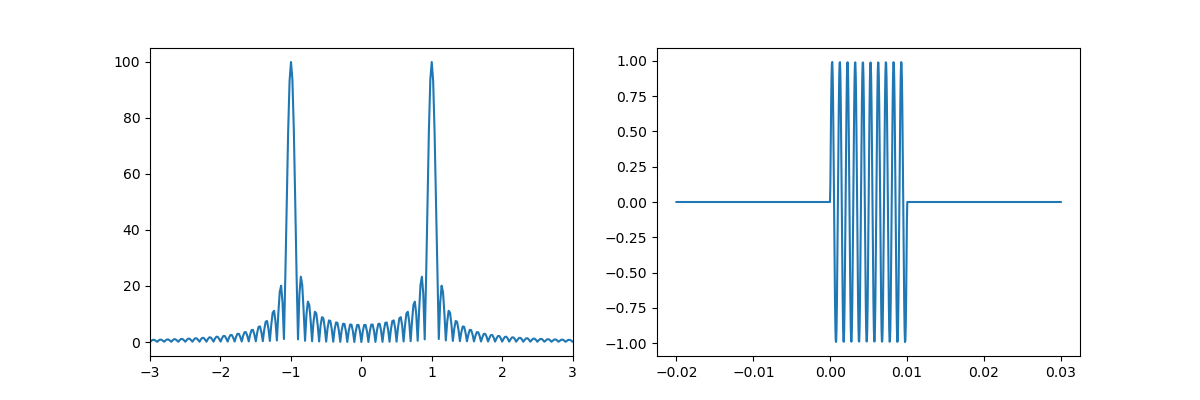

In [13]:
figure(5, figsize=(12,4))
ax = plt.subplot(121)
ax2 = plt.subplot(122)

u_part = fft(u_p)
w_part = fftfreq(len(u_p), d=t_p[1]-t_p[0])/f

def plot_func(x, y):
    ax.clear()
    ax2.clear()
    lims = np.logical_or(abs(w_part) > x, abs(w_part) < y)
    u_temp = u_part.copy()
    u_temp[lims] = 0
    
    ax.plot(fftshift(w_part), fftshift(abs(u_temp)))

    u = np.real(ifft(u_temp))
    ax2.plot(t_p, u)
    
    ax.set_xlim([-3., 3.])
    # ax2.set_xlim([-0.005, 0.005])

    
slider = widgets.FloatSlider(
    value=10.,
    min=0,
    max=10.,
    step=0.1,
    readout=True,
    readout_format='.2f',
    layout={'width': '500px'}
)
slider2 = widgets.FloatSlider(
    value=0,
    min=0,
    max=3.,
    step=0.01,
    readout=True,
    readout_format='.2f',
    layout={'width': '500px'}
)
interact(plot_func, x=slider, y=slider2);

## Validity for general signals in a rectangular pulse

In [14]:
u_pv = np.zeros(N)
u_pv[t_signal] = u0 * (np.random.random(len(t_p[t_signal])) - 0.5)

Text(0.5, 0, '$t$ in s')

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
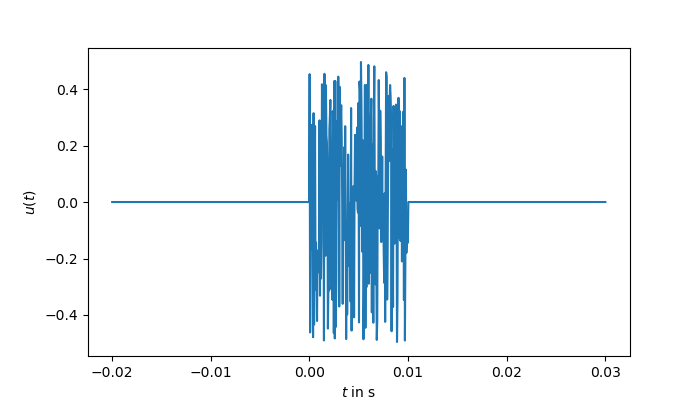

In [15]:
figure(32, figsize=(7,4))
plt.plot(t_p, u_pv)
plt.ylabel('$u(t)$')
plt.xlabel('$t$ in s')

interactive(children=(FloatSlider(value=6.0, description='x', layout=Layout(width='500px'), max=6.0, step=0.01…

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
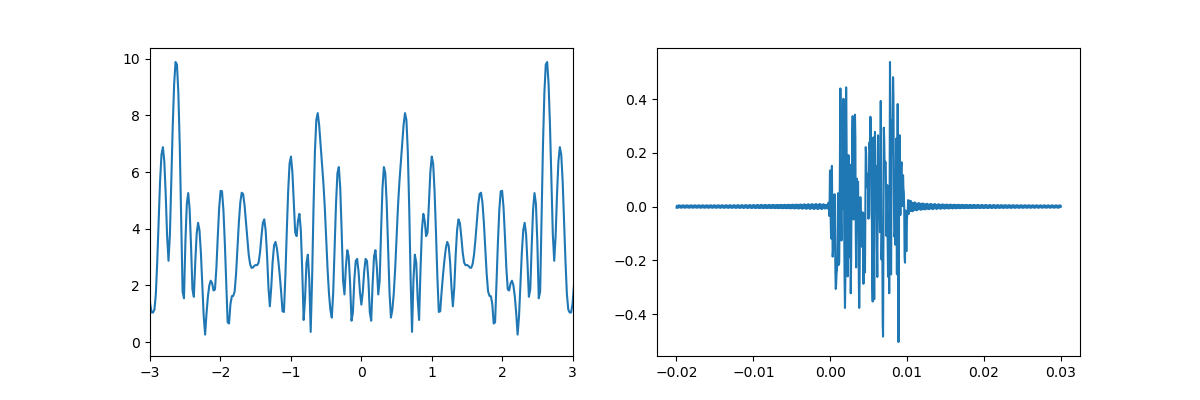

In [16]:
figure(52, figsize=(12,4))
ax = plt.subplot(121)
ax2 = plt.subplot(122)

u_partv = fft(u_pv)

def plot_func(x, y):
    ax.clear()
    ax2.clear()
    lims = np.logical_or(abs(w_part) > x, abs(w_part) < y)
    u_temp = u_partv.copy()
    u_temp[lims] = 0
    
    ax.plot(fftshift(w_part), fftshift(abs(u_temp)))

    u = np.real(ifft(u_temp))
    ax2.plot(t_p, u)
    
    ax.set_xlim([-3., 3.])
    
slider = widgets.FloatSlider(
    value=6.,
    min=0,
    max=6.,
    step=0.01,
    readout=True,
    readout_format='.2f',
    layout={'width': '500px'}
)
slider2 = widgets.FloatSlider(
    value=0,
    min=0,
    max=3.,
    step=0.01,
    readout=True,
    readout_format='.2f',
    layout={'width': '500px'}
)
interact(plot_func, x=slider, y=slider2);

This almost works, but the signal is centered around zero. It's better

In [17]:
u_pv2 = np.zeros(N)

# Amount of random sin functions
N_sin = 8
coeffs = np.random.random(N_sin)
freqs = (2 * 1e3 - 5*1e2) * np.random.random(N_sin) + 5*1e2
u_pv2[t_signal] = u0 * coeffs.dot([np.sin(2*np.pi*fi*t_p[t_signal]) for fi in freqs])

Text(0.5, 0, '$t$ in s')

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
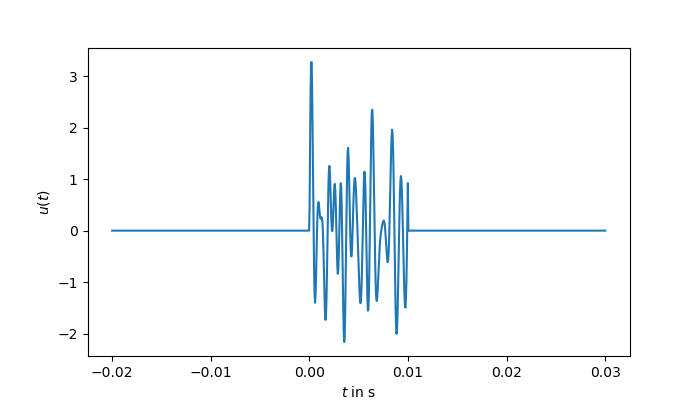

In [18]:
figure(33, figsize=(7,4))
plt.plot(t_p, u_pv2)
plt.ylabel('$u(t)$')
plt.xlabel('$t$ in s')

interactive(children=(FloatSlider(value=3.0, description='x', layout=Layout(width='500px'), max=3.0, step=0.01…

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
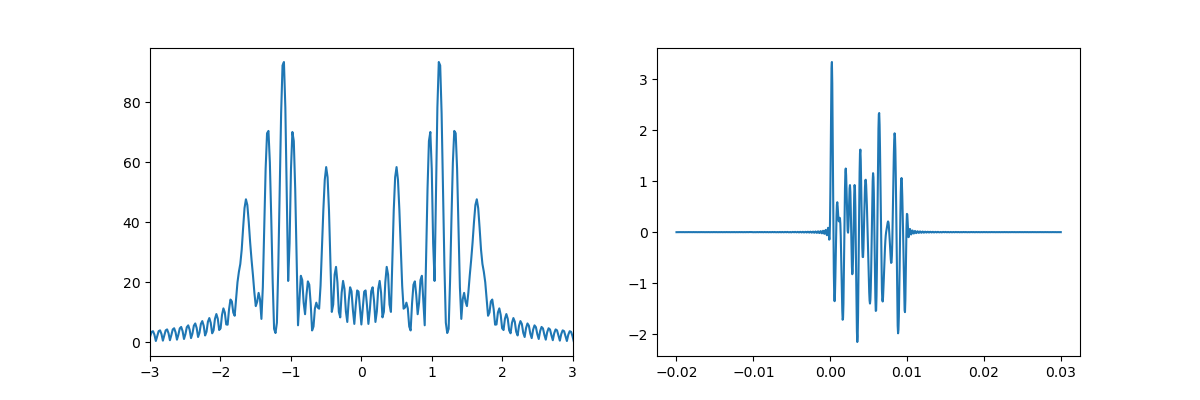

In [19]:
figure(53, figsize=(12,4))
ax = plt.subplot(121)
ax2 = plt.subplot(122)

u_partv2 = fft(u_pv2)

def plot_func(x, y):
    ax.clear()
    ax2.clear()
    lims = np.logical_or(abs(w_part) > x, abs(w_part) < y)
    u_temp = u_partv2.copy()
    u_temp[lims] = 0
    
    ax.plot(fftshift(w_part), fftshift(abs(u_temp)))

    u = np.real(ifft(u_temp))
    ax2.plot(t_p, u)
    
    ax.set_xlim([-3., 3.])
    
slider = widgets.FloatSlider(
    value=3.,
    min=0,
    max=3.,
    step=0.01,
    readout=True,
    readout_format='.2f',
    layout={'width': '500px'}
)
slider2 = widgets.FloatSlider(
    value=0,
    min=0,
    max=3.,
    step=0.01,
    readout=True,
    readout_format='.2f',
    layout={'width': '500px'}
)
interact(plot_func, x=slider, y=slider2);